# Import all the necessary libraries

In [1]:
# Prerequisite imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import LabelEncoder


# Business / Data understanding

In [2]:
# Set the display options to show all the columns 
pd.set_option('display.max_columns', None)

# Load the dataset
df = pd.read_csv('Data/Invistico_Airline.csv')
df.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0


In [3]:
# Show the shape of the dataset
df.shape

(129880, 22)

In [4]:
# show the datatypes of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [5]:
# Show some statistics of the dataset
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
# Check for missing values
df.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

> Here we can see that there are 393 NaN values in the 'Arrival Delay in Minutes' column. We will drop these as they are onyl a small part of the dataset.

# Data preperation

In [7]:
# Dropping columns with NaN values
df = df.dropna()

In [8]:
# Check for duplicates in the dataset
df.duplicated().sum()

0

In [9]:
# Convert all  the columns that could be considered a 'score' (0 to 5) to a categorical datatype for visualization.
for col in ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 
            'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness',
            'Online boarding']:
    df[col] = df[col].astype('category')


In [10]:
df.info(10)

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   satisfaction                       129487 non-null  object  
 1   Customer Type                      129487 non-null  object  
 2   Age                                129487 non-null  int64   
 3   Type of Travel                     129487 non-null  object  
 4   Class                              129487 non-null  object  
 5   Flight Distance                    129487 non-null  int64   
 6   Seat comfort                       129487 non-null  category
 7   Departure/Arrival time convenient  129487 non-null  category
 8   Food and drink                     129487 non-null  category
 9   Gate location                      129487 non-null  category
 10  Inflight wifi service              129487 non-null  category
 11  Inflight entertainment         

In [11]:
# Made the decision to only inlcude the columns that do not have a score category when checking for unique values.
columns_to_check = ['satisfaction', 'Customer Type', 'Type of Travel', 'Class', ]
for column in columns_to_check:
    print(f"Unique values in '{column}' : {df[column].unique()}")

Unique values in 'satisfaction' : ['satisfied' 'dissatisfied']
Unique values in 'Customer Type' : ['Loyal Customer' 'disloyal Customer']
Unique values in 'Type of Travel' : ['Personal Travel' 'Business travel']
Unique values in 'Class' : ['Eco' 'Business' 'Eco Plus']


# Exploratory data analysis
### Plot all the categorical columns in relation to 'satisfaction'.

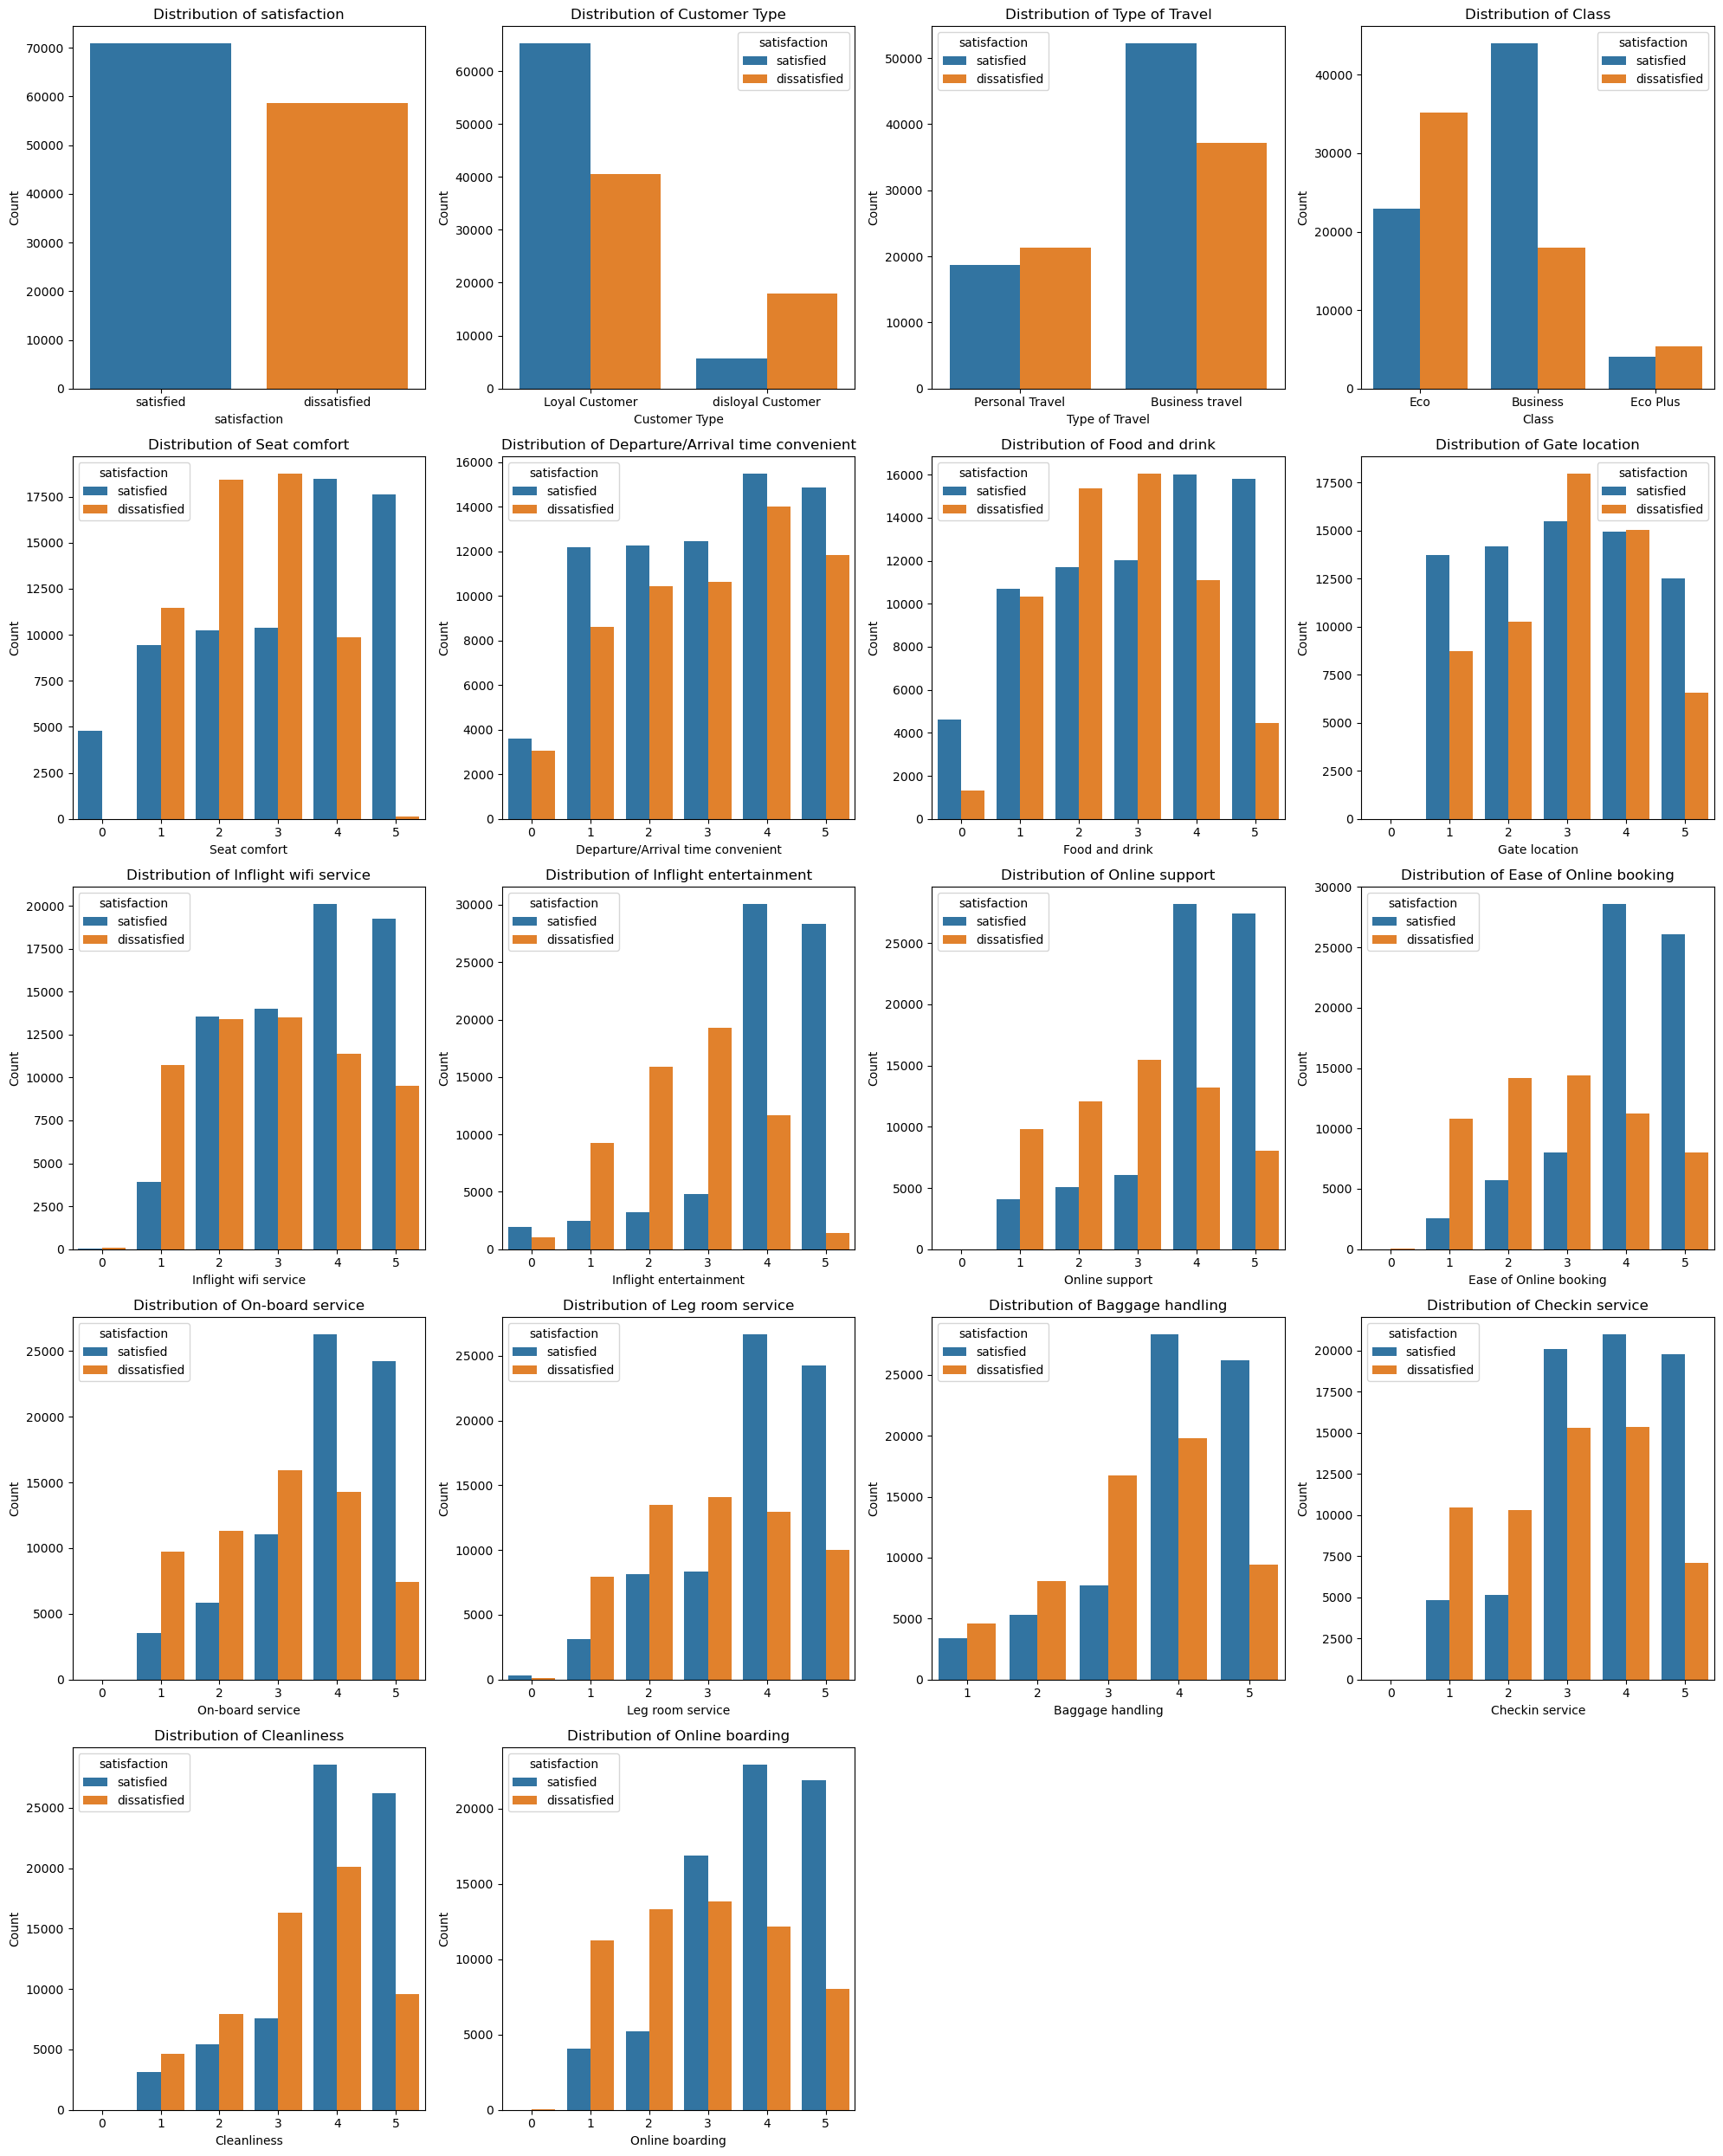

In [12]:
# Define categorical columns
categorical_columns = ['satisfaction', 'Customer Type', 'Type of Travel', 'Class', 'Seat comfort', 
                       'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
                       'Inflight wifi service', 'Inflight entertainment', 'Online support', 
                       'Ease of Online booking', 'On-board service', 'Leg room service', 
                       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

# Set up the grid layout for subplots
n_cols = 4  # Number of plots per row
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))  # Adjust figure size dynamically

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each categorical column and create a bar plot
for i, col in enumerate(categorical_columns):
    # Create the count plot
    sns.countplot(x=df[col], ax=axes[i], hue=df['satisfaction'])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [13]:
# Apply LabelEncoder to each categorical column
le = LabelEncoder()


for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

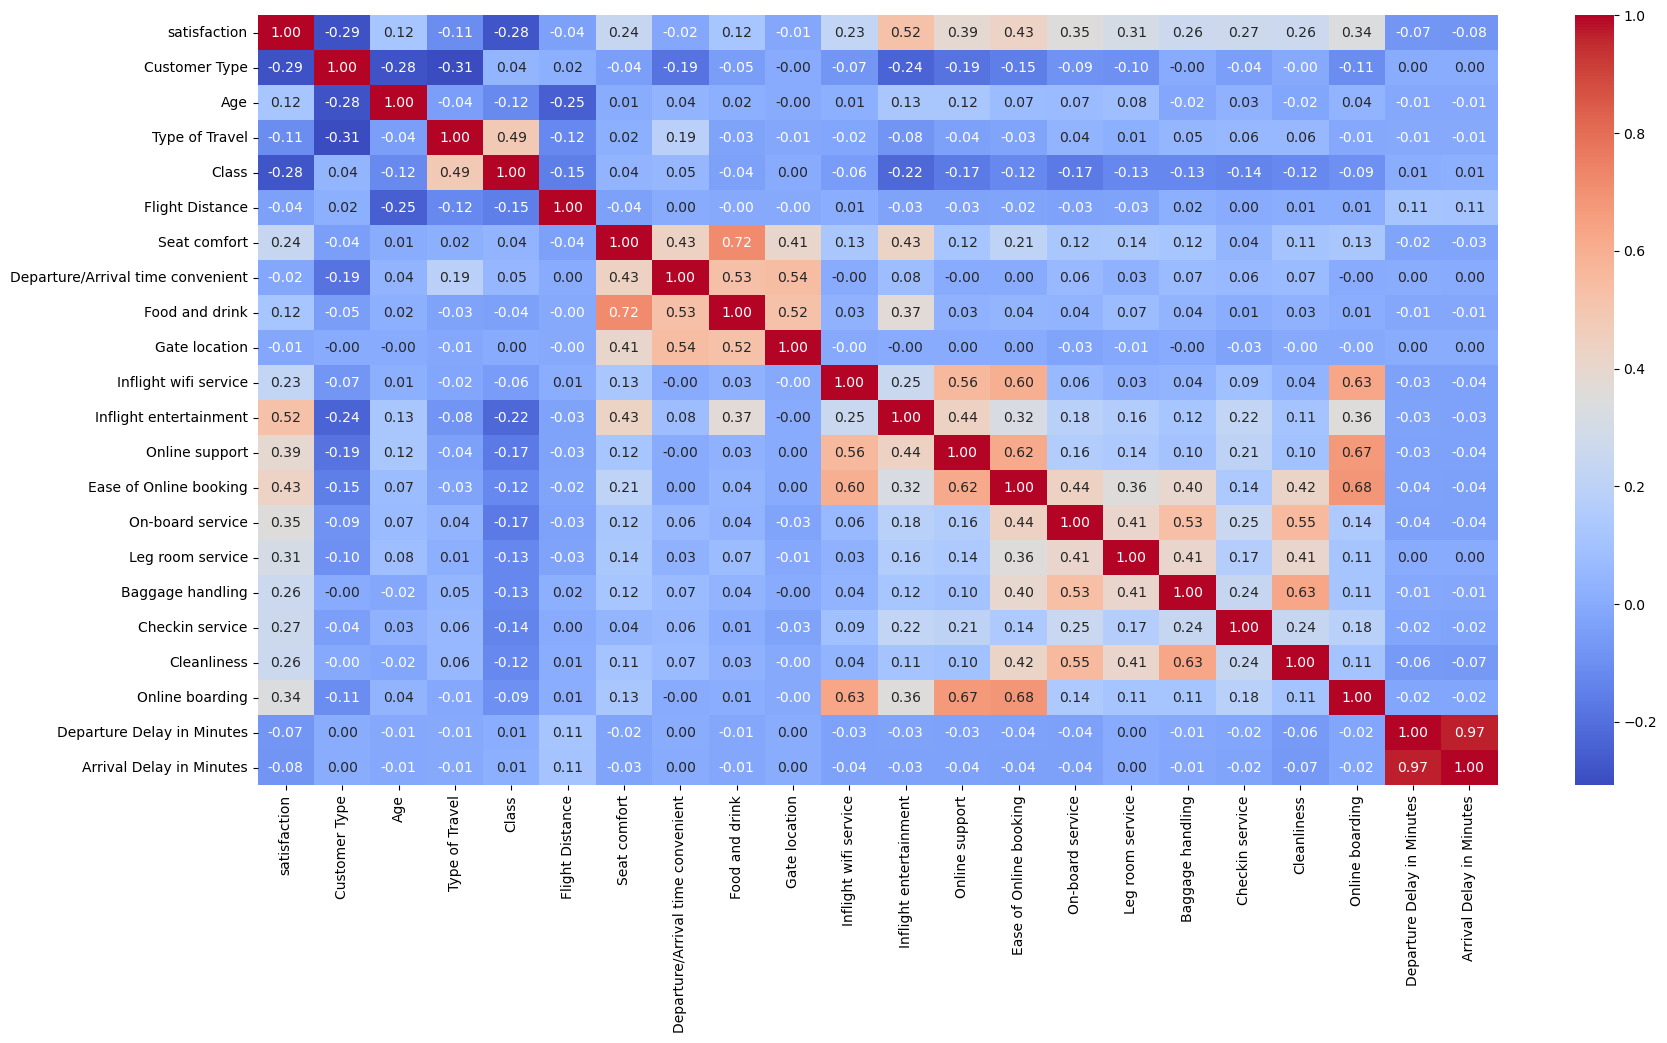

In [14]:
# Plotting a heatmap to visualize the correlation between the features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [15]:
# Set up the train and test sets
def train_test_split_data(df, target, random_state, test_size):
    X_train,y_train,X_test,y_test= train_test_split(df.drop([target], axis=1),
                                                    df[target],
                                                    random_state=random_state,
                                                    test_size=0.20,
                                                    stratify=df[target])
    return X_train, X_test, y_train,y_test

X_train, y_train, X_test, y_test=  train_test_split_data(df, target='satisfaction', random_state=65, test_size=0.20)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((103589, 21), (103589,), (25898, 21), (25898,))

In [16]:
sm= SMOTE(sampling_strategy='minority', random_state=98)
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
X_train_smote.shape, y_train_smote.shape

((113410, 21), (113410,))

# Modeling & evaluation

### As a baseline, it was deicided to run a barebones Logistic Regression model to set a benchmark which the others models would have to beat.
### As can be seen, the model manages a respectable 82.7% on Accuracy, 84.2% on F1, 84.0% on Precision, and 84.3% on Recall, while running for 28.9 seconds. 

-------------------------------
Accuracy:[0.827361186191984]
F1-Score:[0.842075518349758]
Precision:[0.8407984764054455]
Recall:[0.8433564454506863]
-------------------------------
Classifiaction Reoprt
-------------------------------
              precision    recall  f1-score   support

           0      0.808     0.811     0.810     11721
           1      0.843     0.841     0.842     14177

    accuracy                          0.827     25898
   macro avg      0.826     0.826     0.826     25898
weighted avg      0.827     0.827     0.827     25898

Confusion_Matrix


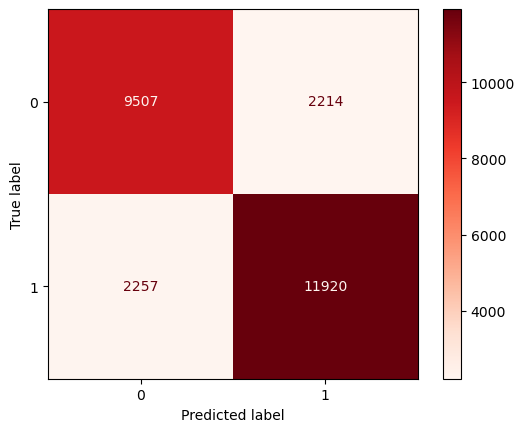

CPU times: user 3min 21s, sys: 9.52 s, total: 3min 30s
Wall time: 28.9 s


In [17]:
%%time
lr = LogisticRegression(max_iter=10000, random_state=56)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("-------------------------------")

accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]

accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))

# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}") 
print(f"Recall:{recall_scores}")

print("-------------------------------")
print("Classifiaction Reoprt")
print("-------------------------------")
print(classification_report(y_test,y_pred,digits=3))
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Reds") 
plt.show()

### To get a better view of which features impact the prediction the most. It was deicided to plot the top 5 most important features for each model.
### In the case of the Logistic Regression model, this is shown as coefficient values. Meaning, as the feature value increases, the likelihood of the positive class increases, and as the negative value increases, the likelihood of the positive class decreases.
### As can be seen for the Logistic Regression model, the Inlflight entertainment has the most positive impact on  if a customer ends up 'satisfied' or 'dissatisfied'. This is a trend we will see occur for the other models as well.

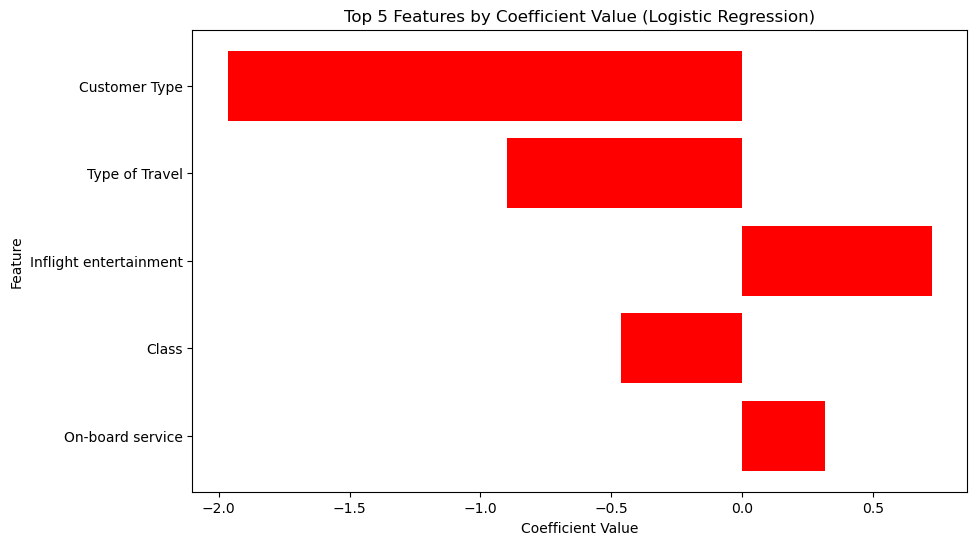

In [26]:
# Ensure the model is fitted before accessing `coef_`
coefficients = lr.coef_[0]  # Get the coefficients for the first class (binary classification)

# Create a DataFrame for feature coefficients
feature_coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,  # Replace with your feature names
    'Coefficient': coefficients
})

# Calculate the absolute value of coefficients to find the most impactful features
feature_coefficients_df['Abs_Coefficient'] = np.abs(feature_coefficients_df['Coefficient'])

# Sort features by absolute coefficient value
feature_coefficients_df = feature_coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select the top 5 features
top_5_features = feature_coefficients_df.head(5)

# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Coefficient'], color='Red')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 5 Features by Coefficient Value (Logistic Regression)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

### Then the decision was then made to run a Random Forest Classifier as the 2nd model, as this is a very well known, and well performing classification model. Here, hyper parameters were set for better performance.
### As can be seen, this models manages a very some great scores. 95.6% on accuracy, 95.9% on F-1, 94.7% on precision, and 97.1% on recall. The model did need a longer time run. Just over 3 minutes, but consdering to score increase as compared to the Logistic Regression model. This is a minor trade-off.

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomForestClassifier(max_features=10, n_estimators=300, random_state=48)
-------------------------------
Accuracy:[0.9563672870491929]
F1-Score:[0.9596457395900293]
Precision:[0.947732242364393]
Recall:[0.9718625678119349]
-------------------------------
Classifiaction Reoprt
-------------------------------
              precision    recall  f1-score   support

           0      0.939     0.967     0.953     11721
           1      0.972     0.948     0.960     14177

    accuracy                          0.956     25898
   macro avg      0.955     0.957     0.956     25898
weighted avg      0.957     0.956     0.956     25898

Confusion_Matrix


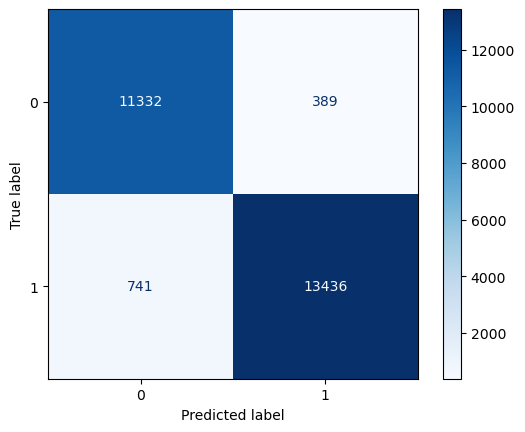

CPU times: user 55.6 s, sys: 1.4 s, total: 57 s
Wall time: 3min 8s


In [ ]:
%%time
rf=RandomForestClassifier(random_state=48)

hyper_params = {"max_features": [3,10],
                "min_samples_split":[2, 10],
                "min_samples_leaf":[1, 10],
                "n_estimators":[100, 300],
                "criterion":["gini"]}
    
model = RandomizedSearchCV(
    rf, hyper_params, cv=3, scoring="f1_macro", n_jobs=-1, n_iter=15, random_state=13
)
model.fit(X_train_smote,y_train_smote)
y_pred= model.predict(X_test)
print(model.best_estimator_)

print("-------------------------------")

accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]


accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))

# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}") 
print(f"Recall:{recall_scores}")

print("-------------------------------")
print("Classifiaction Reoprt")
print("-------------------------------")
print(classification_report(y_test,y_pred,digits=3))
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Blues")
plt.show()

### For the Random Forest classifier and the Gradient Boosting classifier, the features are given a score indicating how much it contributes to the model's predictions. Instead of using coefficients like the Logistic Regresssion model.
### Here we can see the top 5 features by importance, just as with the Logistic regression model the Inflight entertrainment scores the highest. So it is reasonable to conclude that increasing the quality, should result in a increase of 'satisfaction'.

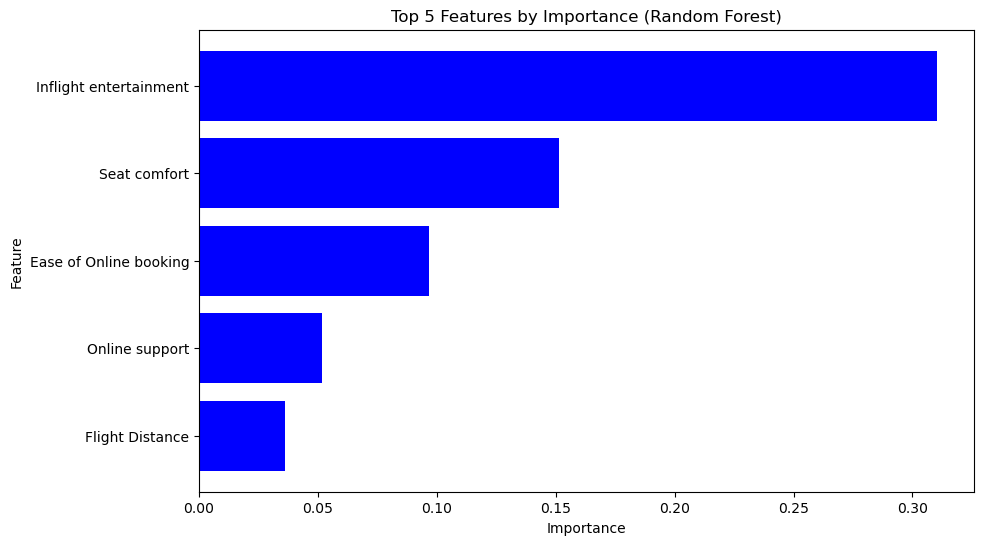

In [20]:
best_model = model.best_estimator_

# Get feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train_smote.columns,  # Replace with your feature names
    'Importance': feature_importances
})

# Sort features by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Select the top 5 features
top_5_features = feature_importances_df.head(5)

# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'], color='Blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Features by Importance (Random Forest)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

### The 3rd, and final model is a Gradient Boosting Classifier, which is also a well known model for classification problems. 
### This model scores slightly lower that the Random Forest classifier. With the scores being 94.7% on Accuracy, 95.2% on F-1, 94.3% on Precision, and 96.0% on Recall. But doing this while running noticibly quicker than the Random Forest classifier at 1 minute and 17 seconds.

GradientBoostingClassifier(learning_rate=0.3, max_features=10, n_estimators=300,
                           random_state=98)
-------------------------------
Accuracy:[0.9479496486215152]
F1-Score:[0.9520182245319285]
Precision:[0.9432884249135924]
Recall:[0.9609111159014155]
-------------------------------
Classifiaction Reoprt
-------------------------------
              precision    recall  f1-score   support

           0      0.933     0.954     0.943     11721
           1      0.961     0.943     0.952     14177

    accuracy                          0.948     25898
   macro avg      0.947     0.948     0.948     25898
weighted avg      0.948     0.948     0.948     25898

Confusion_Matrix


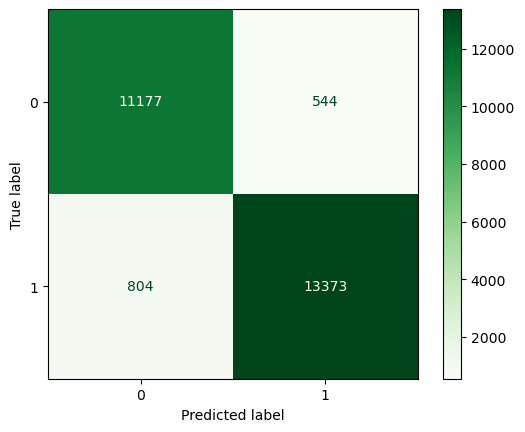

CPU times: user 19.2 s, sys: 1.3 s, total: 20.5 s
Wall time: 1min 17s


In [23]:
%%time
gb=GradientBoostingClassifier(random_state=98)

hyper_params = {"max_features": [3,10],
                "min_samples_split":[2, 10],
                "min_samples_leaf":[1, 10],
                "n_estimators":[100, 300],
                "learning_rate":[0.05, 0.1, 0.3]}

model = RandomizedSearchCV(
    gb, hyper_params, cv=3, scoring="f1_macro", n_jobs=-1, n_iter=20, random_state=87
)
model.fit(X_train_smote,y_train_smote)
y_pred= model.predict(X_test)
print(model.best_estimator_)

print("-------------------------------")

accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]


accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))

# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}") 
print(f"Recall:{recall_scores}")

print("-------------------------------")
print("Classifiaction Reoprt")
print("-------------------------------")
print(classification_report(y_test,y_pred,digits=3))
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Greens")
plt.show()

### For the Gradient Boosting classifier, it is much of the same when it comes to the feature importances when compared to the Random Forest classifier. Only For the Gradient Boosting classifier, the Inflight entertainmant has even more impact. This can be due to how the model comes to it decision as the last 2 features differ from the Gradient Boosting classifier.

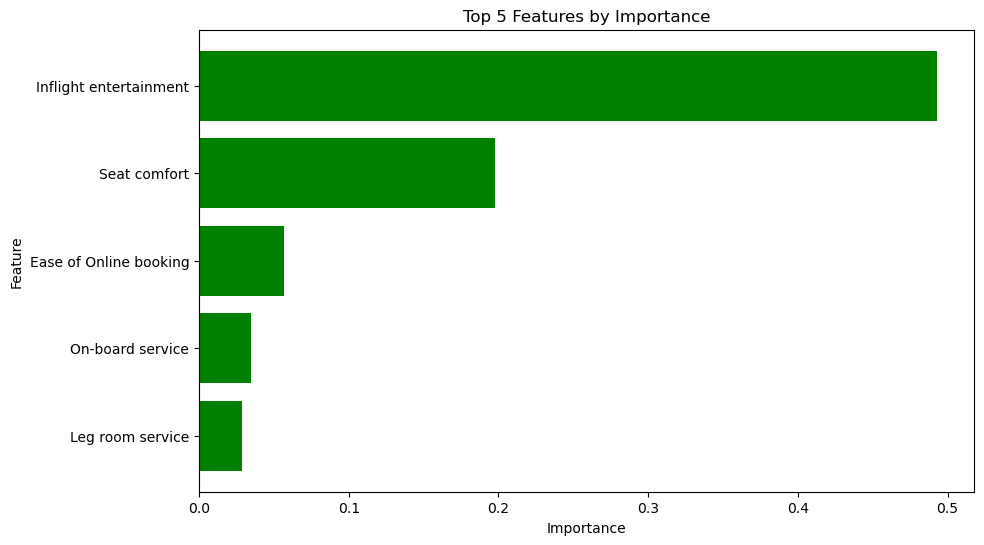

In [24]:
best_model = model.best_estimator_

# Get feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train_smote.columns,  # Replace with your feature names
    'Importance': feature_importances
})

# Sort features by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Select the top 5 features
top_5_features = feature_importances_df.head(5)

# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'], color='Green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Features by Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()